In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [51]:
perfiles = pd.read_csv('Data/uPerfil_Clear.csv')
perfiles.drop('Unnamed: 0',axis=1,inplace=True)
users=perfiles['userID']
perfiles.drop('userID',axis=1,inplace=True)
rating = pd.read_csv('Data/rating_final.csv')
rInfo=pd.read_csv('Data/rInfo.csv')
rInfo.drop('Unnamed: 0',axis=1,inplace=True)
array_norm = perfiles.values

### Preparación de los datos
Vamos a crear un nuevo indice para los restaurantes para que sea incremental. Y creamos una variable de calificación final a partir de las calificaciones.

In [52]:
rInfo.head()

,placeID,name,alcohol,smoking_area,price,dress_code,parking_lot
0,134999,Kiku Cuernavaca,No_Alcohol_Served,none,medium,informal,None
1,132825,puesto de tacos,No_Alcohol_Served,none,low,informal,None
2,135106,El Rinc�n de San Francisco,Wine-Beer,only at bar,medium,informal,None
3,132667,little pizza Emilio Portes Gil,No_Alcohol_Served,none,low,informal,None
4,132613,carnitas_mata,No_Alcohol_Served,permitted,medium,informal,yes


In [53]:
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [70]:
restaurantes = rInfo['placeID'].unique()
dict_restaurantes = {j:i for i,j in enumerate(restaurantes)}
rInfo['placeID'] = rInfo['placeID'].apply(lambda x: dict_restaurantes[x])
rating['placeID'] = rating['placeID'].apply(lambda x: dict_restaurantes[x])

In [55]:
rInfo.head()

,placeID,name,alcohol,smoking_area,price,dress_code,parking_lot
0,0,Kiku Cuernavaca,No_Alcohol_Served,none,medium,informal,None
1,1,puesto de tacos,No_Alcohol_Served,none,low,informal,None
2,2,El Rinc�n de San Francisco,Wine-Beer,only at bar,medium,informal,None
3,3,little pizza Emilio Portes Gil,No_Alcohol_Served,none,low,informal,None
4,4,carnitas_mata,No_Alcohol_Served,permitted,medium,informal,yes


In [56]:
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,121,2,2,2
1,U1077,60,2,2,1
2,U1077,1,2,2,2
3,U1077,54,1,2,2
4,U1068,72,1,1,2


Vemos que tenemos 3 califaciones para cada restaurante, vamos a crear una única usando estas tres, dando más peso a la general.

In [57]:
rating['rating_final']=2*rating['rating']+rating['food_rating']+rating['service_rating']
rating.head()

,userID,placeID,rating,food_rating,service_rating,rating_final
0,U1077,121,2,2,2,8
1,U1077,60,2,2,1,7
2,U1077,1,2,2,2,8
3,U1077,54,1,2,2,6
4,U1068,72,1,1,2,5


In [58]:
rating[rating['userID']=='U1077']

,userID,placeID,rating,food_rating,service_rating,rating_final
0,U1077,121,2,2,2,8
1,U1077,60,2,2,1,7
2,U1077,1,2,2,2,8
3,U1077,54,1,2,2,6
433,U1077,97,0,1,1,2


### Creación de la matriz de co-ocurrencia
Nos quedamos con los restaurantes que tienen buena puntuación, más de 4. Y creamos la matriz de co-ocurrencia con estos datos. Para ello lo hacemos en dos pasos: 
* Construimos un diccionario con los restaurantes por usuario.
* Creamos la matriz a partir del diccionario del punto anterior.

In [59]:
dict_rest_user=rating[rating['rating_final']>4].groupby('userID')['placeID'].apply(np.array).to_dict()
dict_rest_user

{'U1001': array([ 1, 34, 63]),
 'U1002': array([110, 113,   1,  21,  47,  40,  45]),
 'U1003': array([  1, 108,  21,  17,  95,  62, 101,  50,  37, 117,  47]),
 'U1004': array([120,   2, 113, 119,  39,  46,  93]),
 'U1005': array([ 33,  13,  52,  36,  25, 119]),
 'U1006': array([  7,  69,  95, 108,  82,  35,  70]),
 'U1007': array([ 36, 116]),
 'U1008': array([68, 16]),
 'U1009': array([117,  21,  47,  80, 116,  60,  65,  37]),
 'U1010': array([25, 13]),
 'U1011': array([83]),
 'U1012': array([ 48,  22, 100, 112,  58]),
 'U1013': array([126,   7, 110, 108,  75]),
 'U1014': array([13, 33, 61, 10, 52, 87]),
 'U1015': array([ 44, 129]),
 'U1016': array([ 80,  25, 119,   2,  18,  28,  54,  52, 121,  65,  21,  63, 113]),
 'U1017': array([31]),
 'U1018': array([9]),
 'U1020': array([ 26, 127]),
 'U1021': array([86, 19, 96]),
 'U1022': array([ 20, 119,  36,  54,  65,  60,  28,  63, 105, 113,  49]),
 'U1023': array([94]),
 'U1024': array([ 25, 119,  99,  28]),
 'U1025': array([125,  29,  79, 12

In [72]:
len(dict_restaurantes)

130

In [73]:
coMatrix = np.zeros((len(dict_restaurantes), len(dict_restaurantes)))
for user,restaurant in dict_rest_user.items():
    for m in restaurant:
        coMatrix[m, restaurant] += 1

In [74]:
coMatrix

array([[ 3.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0., 18.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  4.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

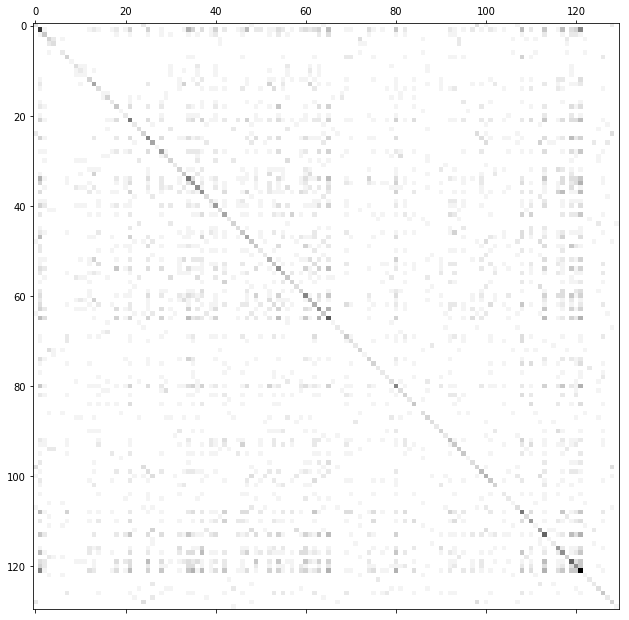

In [69]:
plt.matshow(coMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

### Recomendación usando la matriz de co-ocurrencia

* Definimos una función para buscar los K-restaurantes con mayor similitud.
* Usando los K-restaurantes del punto anterior hacemos la recomendación para el usuario.

In [75]:
def similitud(item_id, coocurrencia, ktop=10):
    # Nos quedamos con la fila con el Id de la pelicula que le pasamos.
    similarItems = coocurrencia[item_id, :]
    # Ordenamos y devolvemos el id de los items más similares.
    mostSimilar = np.argsort(similarItems)[::-1]
    # Quitamos el primer item ya que es sí mismo.
    mostSimilar = mostSimilar[1:ktop+1]
    
    # Devolvemos un array de numpy
    return np.stack((mostSimilar, similarItems[mostSimilar])).T

In [76]:
similitud(0, coMatrix, 5)

array([[ 98.,   3.],
       [ 24.,   2.],
       [128.,   2.],
       [107.,   1.],
       [ 48.,   1.]])

In [78]:
def recomendacion(items_id, coocurrencia, ktop=10):
    # Para la lista de items que le pasamos usamos la funcion que hemos definido anteriormente para buscar los mas similares
    list_sim_items = np.vstack([similitud(id_, coocurrencia, ktop) for id_ in items_id])
    # Agrupamos y nos quedamos con aquellos items que más aparecen
    largest_freq = pd.DataFrame(list_sim_items, columns=['id', 'freq']).groupby('id').agg(max).reset_index()
    
    # Ordenamos
    sorted_list = largest_freq.sort_values(by='freq', ascending=False)
    
    # Nos quedamos con los primeros valores
    out = sorted_list.values[:ktop, 0]
    return out
    

Usamos esta función para hacer las recomendaciones. Para ello creamos un DataFrame con los usuarios y sus restaurantes.

In [86]:
df_user_rest=rating.groupby('userID')['placeID'].apply(list).reset_index().sort_index()
df_user_rest.head()

,userID,placeID
0,U1001,"[87, 1, 121, 5, 99, 28, 20, 34, 63]"
1,U1002,"[110, 113, 2, 1, 65, 21, 47, 40, 45, 121]"
2,U1003,"[59, 1, 108, 21, 40, 17, 95, 62, 101, 50, 37, ..."
3,U1004,"[54, 120, 2, 113, 119, 39, 46, 93]"
4,U1005,"[33, 13, 87, 52, 40, 36, 102, 25, 119]"


In [97]:
df_user_rest ['placeRM'] = df_user_rest['placeID'].apply(lambda x: recomendacion(x, coMatrix, len(restaurantes)))
df_user_rest.head()

,userID,placeID,placeRM
0,U1001,"[87, 1, 121, 5, 99, 28, 20, 34, 63]","[121.0, 1.0, 65.0, 80.0, 113.0, 35.0, 34.0, 10..."
1,U1002,"[110, 113, 2, 1, 65, 21, 47, 40, 45, 121]","[1.0, 121.0, 65.0, 113.0, 35.0, 34.0, 80.0, 63..."
2,U1003,"[59, 1, 108, 21, 40, 17, 95, 62, 101, 50, 37, ...","[121.0, 34.0, 65.0, 1.0, 108.0, 37.0, 117.0, 4..."
3,U1004,"[54, 120, 2, 113, 119, 39, 46, 93]","[121.0, 65.0, 113.0, 25.0, 119.0, 21.0, 60.0, ..."
4,U1005,"[33, 13, 87, 52, 40, 36, 102, 25, 119]","[113.0, 25.0, 119.0, 54.0, 49.0, 60.0, 121.0, ..."


### Evaluación del modelo

Para evaluar el sistema recomendador vamos a utilizar dos métricas (Recall at N y Mean Average Precision). Para ello nos basamos en los conceptos de Precision y Recall. Por un lado la Precision es la fracción de los elementos recomendados que son relevantes para el usuario, mientras que Recall es la fracción de elementos relevantes que son recomendados.

Empezamos con recall at N. Que es el Recall hasta un N dado para un usuario y hacemos la media de todos los usuarios. Esto lo calculamos con la fórmula:
### $$\mathrm{recall}@N = \frac{\sum_{i=1}^N rel_i}{\mathrm{min}(N, \sum_{i\in \mathcal{I}_u} 1})$$

In [110]:
def recall_user(N, test, recommended):
    intersection = len(set(test) & set(recommended[:N]))
    return intersection / float(np.minimum(N, len(test)))

In [123]:
topk = [3, 5, 10, 15, 25, 50]
for k in topk:
    list_recall_user=[]
    for a in df_user_rest.index:
        list_recall_user.append(recall_user(k, df_user_rest['placeID'][a], df_user_rest['placeRM'][a]))
    print("recall@%s=%.3f" %(k, np.mean(list_recall_user)))

recall@3=0.389
recall@5=0.399
recall@10=0.480
recall@15=0.616
recall@25=0.784
recall@50=0.932


Ahora realizamos la evaluación según Mean Averaged Precision (MAP). Este métrica es la media de Average Precision (AP) que es el promedio de los valores de precisión sobre todo los rangos donde se encuentran items relevantes. La fórmula de AP es:

### $$\mathrm{AP}@N = \frac{\sum_{k=1}^N \left(\sum_{i=1}^k rel(i)\right)/k \times rel(k)}{\mathrm{min}(N, \sum_{i\in \mathcal{I}_u} 1)}$$

In [129]:
def apk(N, test, recommended):
    predicted = recommended[:N] # top-k predictions
    
    score = 0.0 # This will store the numerator
    num_hits = 0.0 # This will store the sum of rel(i)

    for i,p in enumerate(predicted):
        if p in test and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits/(i+1.0)

    return score / min(len(test), N)

In [132]:
topk = [3, 5, 10, 15, 25, 50]
for k in topk:
    list_apk_user=[]
    for a in df_user_rest.index:
        list_apk_user.append(apk(k, df_user_rest['placeID'][a], df_user_rest['placeRM'][a]))
    print("MAP@%s=%.3f" %(k, np.mean(list_apk_user)))

MAP@3=0.308
MAP@5=0.276
MAP@10=0.284
MAP@15=0.328
MAP@25=0.382
MAP@50=0.418
